In [1]:
# Data Handeling
import pandas as pd
import numpy as np
import time

# Data Exploration
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt

# supress warning outputs
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('alll_vals-10-31-2023-extra-drift.csv')

In [ ]:
# Group 2 Bank Fraud Detection
# Stephen Montgomery (smontg12@depaul.edu)
# John Bolgert (jbolgert@depaul.edu)

In [2]:
df

,Unnamed: 0,Unnamed: 0_x,Day,Simulation,Recall,F1 Score,Cost-Savings,Accuracy,Precision,Num_FPs,Num_TPs,Strategy,Model,Retrain_strategy,Detection_Strategy,Unnamed: 0_y,CD_Detected,CD_Occured
0,0,0,0,0,0.125,0.178571,317.566172,0.98850,0.312500,55,25,SGD_Preformance_1,SGD,1,Preformance,0,0,0
1,1,1,1,0,0.145,0.222222,686.376760,0.98985,0.475410,32,29,SGD_Preformance_1,SGD,1,Preformance,1,0,0
2,2,2,2,0,0.120,0.173913,312.863525,0.98860,0.315789,52,24,SGD_Preformance_1,SGD,1,Preformance,2,0,0
3,3,3,3,0,0.110,0.169884,393.458232,0.98925,0.372881,37,22,SGD_Preformance_1,SGD,1,Preformance,3,0,0
4,4,4,4,0,0.000,0.000000,-500.000000,0.98750,0.000000,50,0,SGD_Preformance_1,SGD,1,Preformance,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,7195,395,15,19,0.005,0.007843,-505.297353,0.98735,0.018182,54,1,GBC_PSI_3,GBC,3,PSI,395,0,0
7196,7196,396,16,19,0.005,0.007968,-465.297353,0.98755,0.019608,50,1,GBC_PSI_3,GBC,3,PSI,396,0,0
7197,7197,397,17,19,0.000,0.000000,-380.000000,0.98810,0.000000,38,0,GBC_PSI_3,GBC,3,PSI,397,0,0
7198,7198,398,18,19,0.000,0.000000,-410.000000,0.98795,0.000000,41,0,GBC_PSI_3,GBC,3,PSI,398,0,0


# Swarm plot

In [4]:
# function to vizualize the distriubtions of each strategies metric broken down by Concept drift detction method and model type
def swarm_plot(df, metric):
    fig, (ax1, ax2, ax3) = plt.subplots(3)
    axes_list = [ax1, ax2, ax3]
    i = 0
    sns.set(rc={'figure.figsize':(22,15)})
    
    for d_strat in ['Preformance','Feature_dist','PSI']:
        df_plot = df[df['Detection_Strategy'] == d_strat]
        sns.swarmplot(data=df_plot,x ='Strategy', y =metric,hue='Model',ax = axes_list[i])
        axes_list[i].set_title(d_strat+' '+metric)
        i+=1
    plt.show()

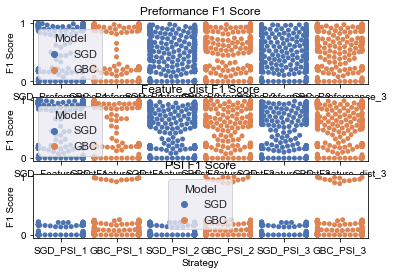

In [5]:
swarm_plot(df, 'F1 Score')

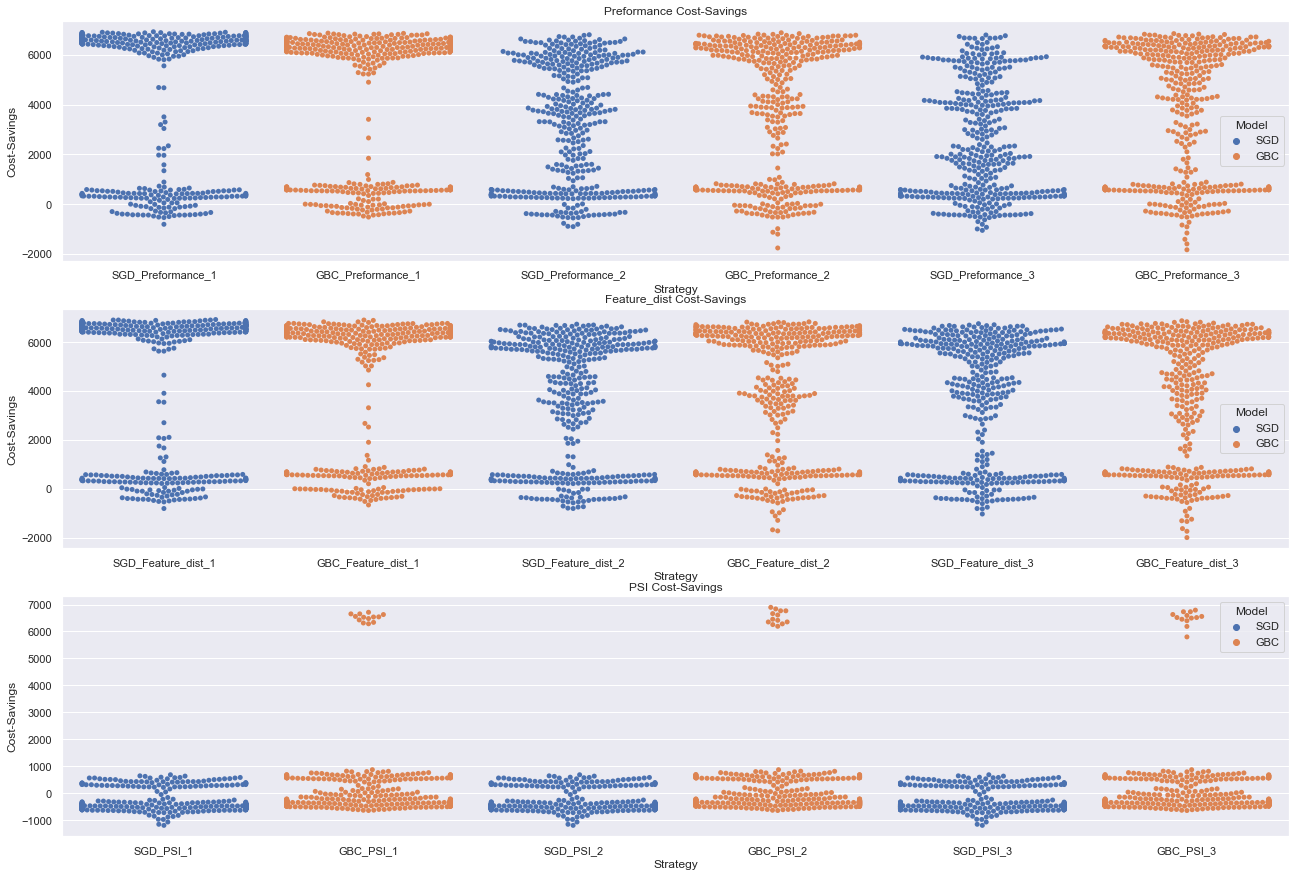

In [6]:
swarm_plot(df, 'Cost-Savings')

# 95% CI Mean Values

In [4]:
# function to plot a 95% CI of the Metric for each strategies metric broken down by Concept drift detction method and model type
def mean_confience_plot(df,metric):
    fig, (ax1, ax2, ax3) = plt.subplots(3)
    axes_list = [ax1, ax2, ax3]
    i = 0
    sns.set(rc={'figure.figsize':(22,15)})

    metric = 'F1 Score'
    for d_strat in ['Preformance','Feature_dist','PSI']:
        df_plot = df[df['Detection_Strategy'] == d_strat]
        sns.pointplot(data=df_plot,x ='Strategy', y =metric,hue='Model',ax = axes_list[i])
        axes_list[i].set_title(d_strat+' '+metric)
        i+=1

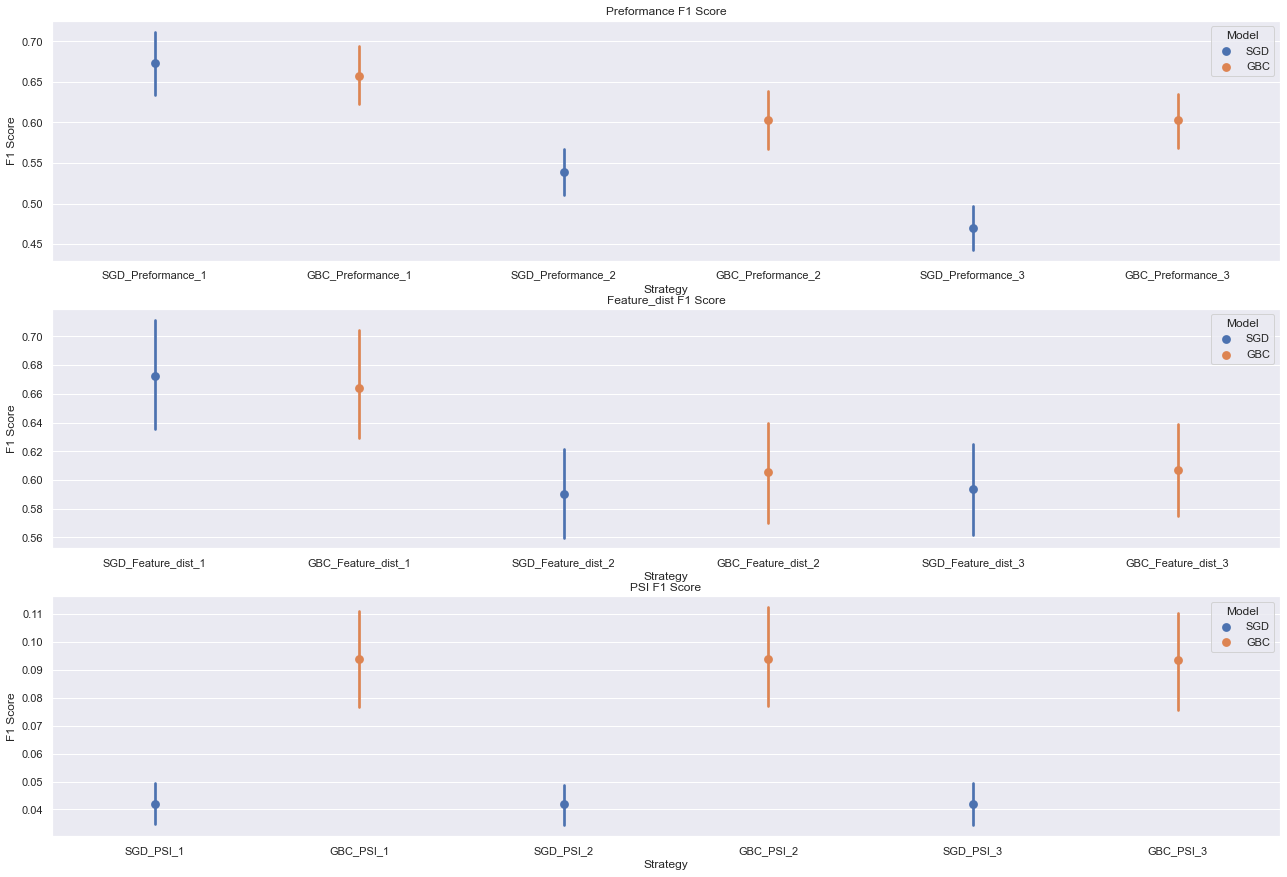

In [5]:
mean_confience_plot(df,'F1 Score')

# Concept Drift Timeplot

### Plot By CD Detection Strategy

In [6]:
# plot to show the prformance during each day across all simulations ofr each strategy boken down by Concept drift detection method
def Line_plot_CD(df,metric):
    fig, (ax1, ax2, ax3) = plt.subplots(3)
    axes_list = [ax1, ax2, ax3]
    i = 0
    sns.set(rc={'figure.figsize':(22,15)})
    CD_Days = [4,9,14]
    for d_strat in ['Preformance','Feature_dist','PSI']:
        df_plot = df[(df['Detection_Strategy'] == d_strat)]
        #wide_df = df.pivot(index="Day", columns="Strategy", values=metric)
        #sns.lineplot(data=wide_df,ax = axes_list[i])
        sns.lineplot(data=df_plot, x="Day", y="F1 Score", hue="Strategy", err_style="bars", errorbar=("se", 2),ax = axes_list[i])
        axes_list[i].set_title(d_strat+' '+metric)
        axes_list[i].set_xticks(range(20))
        axes_list[i].set_title(d_strat+' '+metric)
        for d in CD_Days:
            axes_list[i].axvline(x = d, ymin = 0, ymax = 1,color='Red',label='Drift',dashes=[1,2]) 
        i+=1

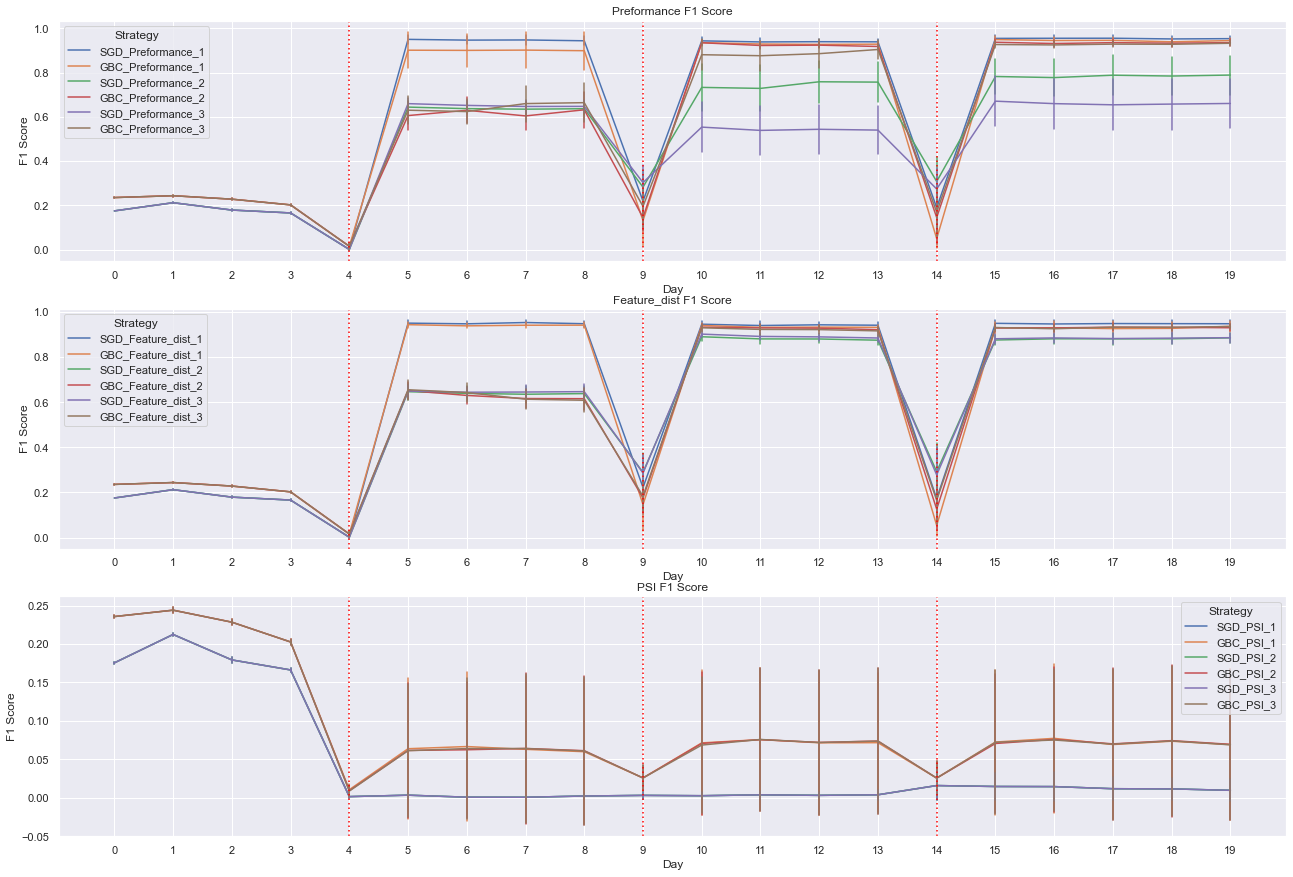

In [7]:
Line_plot_CD(df,'F1 Score')

In [8]:
# Line plot to show preformance per retrain strateegy and concept drift dection method
def Line_plot_CD_by_Model(df,metric):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2)
    axes_list = [ax1, ax2, ax3, ax4, ax5, ax6]
    i = 0
    sns.set(rc={'figure.figsize':(22,15)})
    CD_Days = [4,9,14]
    for d_strat in ['Preformance','Feature_dist','PSI']:
        for Model_typ in ['SGD','GBC']:
            df_plot = df[(df['Detection_Strategy'] == d_strat)&(df['Model'] == Model_typ)]
            #wide_df = df.pivot(index="Day", columns="Strategy", values=metric)
            #sns.lineplot(data=wide_df,ax = axes_list[i])
            sns.lineplot(data=df_plot, x="Day", y="F1 Score", hue="Retrain_strategy", palette=['r', 'g','b'], err_style="bars", errorbar=("se", 2),ax = axes_list[i])
            axes_list[i].set_title(d_strat+' '+metric)
            axes_list[i].set_xticks(range(20))
            axes_list[i].set_title(Model_typ+' '+d_strat+' '+metric)
            for d in CD_Days:
                axes_list[i].axvline(x = d, ymin = 0, ymax = 1,color='Red',label='Drift',dashes=[1,2]) 
            i+=1

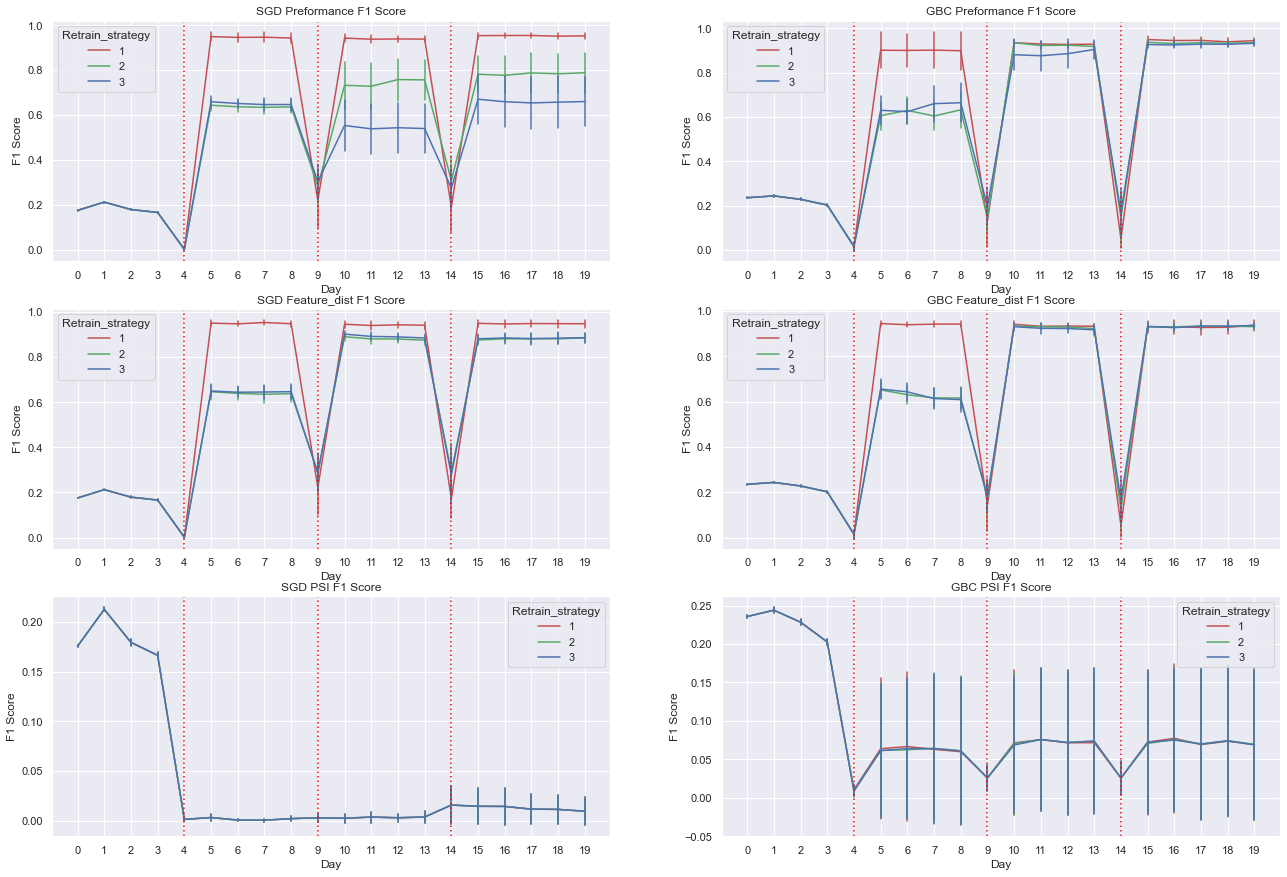

In [9]:
Line_plot_CD_by_Model(df,'F1 Score')

# Average Times Retrained Vs. Preformance

In [10]:
# Scatter plot with trend lines showing realtionship between each strategies sum of times retrained per simulation Vs. Average metric per simulation
def retrain_scatter_plot(df,metric):
    for d_strat in ['Preformance','Feature_dist','PSI']:
        
        agg_data = df[(df['Detection_Strategy']==d_strat)].groupby(['Simulation','Retrain_strategy','Model']).agg({'CD_Detected':'sum', metric:'mean'})
        agg_data = agg_data.reset_index()

        lm = sns.lmplot(data=agg_data,x="CD_Detected", y=metric, hue="Retrain_strategy", height=5, aspect=1.75, col='Model')
        fig = lm.fig 
        title = d_strat+ ' Detection: days Retrained Vs. Mean '+metric
        fig.suptitle(title, fontsize=16)
       

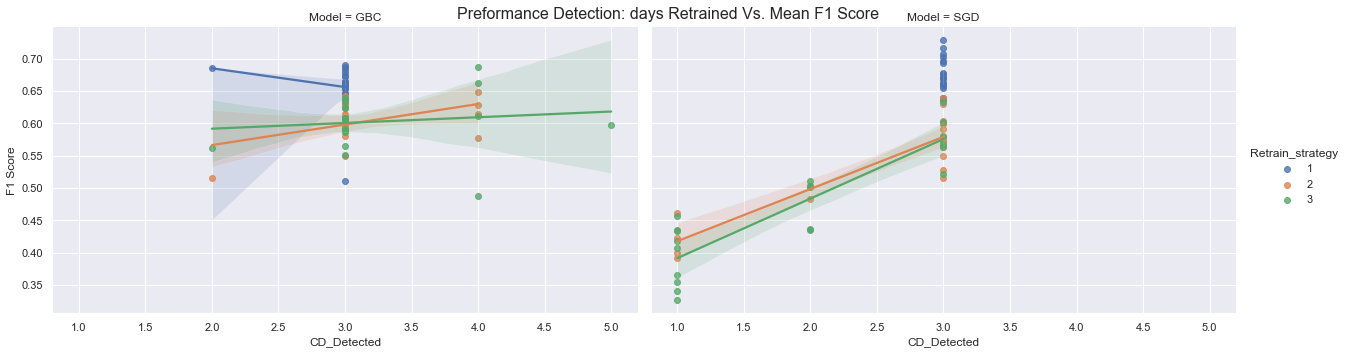

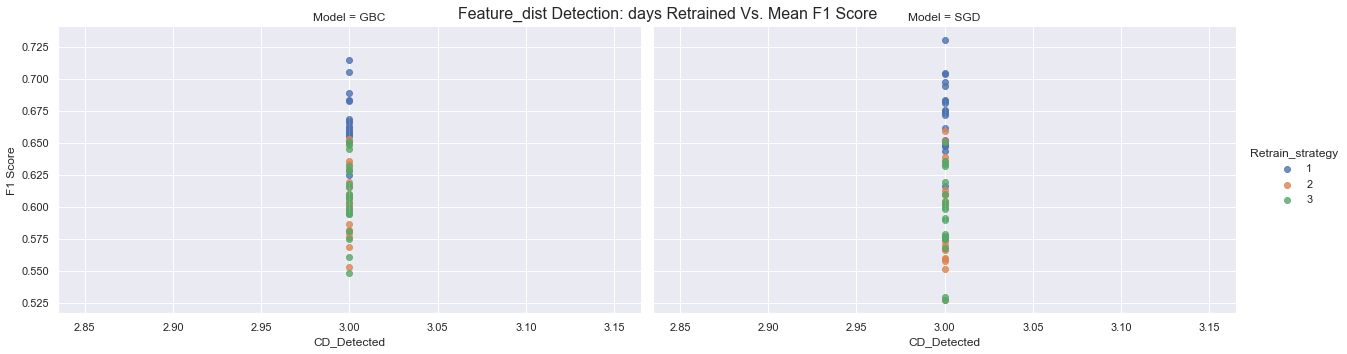

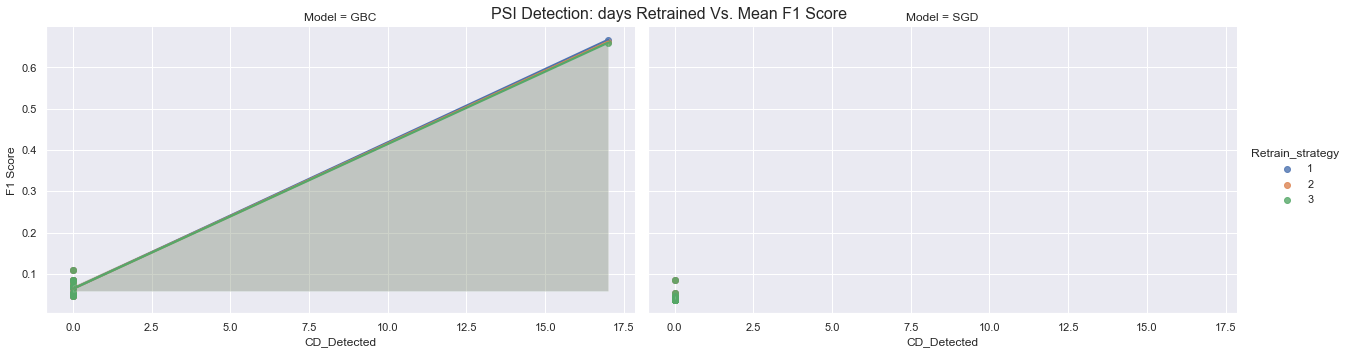

In [11]:
retrain_scatter_plot(df,"F1 Score")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          7200 non-null   int64  
 1   Unnamed: 0_x        7200 non-null   int64  
 2   Day                 7200 non-null   int64  
 3   Simulation          7200 non-null   int64  
 4   Recall              7200 non-null   float64
 5   F1 Score            7200 non-null   float64
 6   Cost-Savings        7200 non-null   float64
 7   Accuracy            7200 non-null   float64
 8   Precision           7200 non-null   float64
 9   Num_FPs             7200 non-null   int64  
 10  Num_TPs             7200 non-null   int64  
 11  Strategy            7200 non-null   object 
 12  Model               7200 non-null   object 
 13  Retrain_strategy    7200 non-null   int64  
 14  Detection_Strategy  7200 non-null   object 
 15  Unnamed: 0_y        7200 non-null   int64  
 16  CD_Det

# Strategy preformance Table

In [13]:
df.groupby(['Model','Detection_Strategy','Retrain_strategy']).agg({'F1 Score':'mean','Cost-Savings':'mean','Precision':'mean'
                                                                   ,'Recall':'mean'}).to_csv('Results_Figure.csv')